<a href="https://colab.research.google.com/github/ciepielajan/Time_series/blob/main/pandas_interpolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Załadowanie plików







In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [3]:
!gdown --id "186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4"

Downloading...
From: https://drive.google.com/uc?id=186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4
To: /content/archive.zip
2.39MB [00:00, 11.2MB/s]


In [4]:
!unzip -q "archive.zip" -d data/

In [5]:
all_file_names = glob.glob("data/*2017.csv")
all_file_names = sorted(all_file_names)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 data/april-2017.csv
1 data/august-2017.csv
2 data/december-2017.csv
3 data/february-2017.csv
4 data/january-2017.csv
5 data/july-2017.csv
6 data/june-2017.csv
7 data/march-2017.csv
8 data/may-2017.csv
9 data/november-2017.csv
10 data/october-2017.csv
11 data/september-2017.csv


In [6]:
jan = pd.read_csv(all_file_names[4])
feb = pd.read_csv(all_file_names[3])
mar = pd.read_csv(all_file_names[7])
apr = pd.read_csv(all_file_names[0])
may = pd.read_csv(all_file_names[8])
jun = pd.read_csv(all_file_names[6])
jul = pd.read_csv(all_file_names[5])
aug = pd.read_csv(all_file_names[1])
sep = pd.read_csv(all_file_names[11])
octo = pd.read_csv(all_file_names[10])
nov = pd.read_csv(all_file_names[9])
dec = pd.read_csv(all_file_names[2])

In [7]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])
year["UTC time"] = pd.to_datetime(year["UTC time"], format="%Y-%m-%dT%H:%M:%S")
year = year.set_index("UTC time")

In [8]:
columns_pm10 = [ i  for i in year.columns if  i.split("_")[1] == "pm10"]

In [9]:
year = year[columns_pm10]
year

,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,174_pm10,176_pm10,177_pm10,178_pm10,179_pm10,180_pm10,181_pm10,182_pm10,183_pm10,184_pm10,185_pm10,187_pm10,189_pm10,192_pm10,194_pm10,195_pm10,196_pm10,201_pm10,202_pm10,203_pm10,204_pm10,205_pm10,208_pm10,209_pm10,210_pm10,211_pm10,212_pm10,213_pm10,214_pm10,215_pm10,216_pm10,218_pm10,219_pm10,220_pm10,221_pm10,222_pm10,223_pm10,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,196.0,346.0,229.0,277.0,256.0,219.0,205.0,212.0,254.0,183.0,335.0,169.0,215.0,NaN,227.0,146.0,NaN,NaN,155.0,213.0,223.0,90.0,224.0,213.0,239.0,378.0,201.0,220.0,NaN,168.0,165.0,209.0,275.0,196.0,230.0,195.0,156.0,NaN,280.0,123.0,210.0,208.0,319.0,334.0,477.0,346.0,171.0,322.0,235.0,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,NaN,NaN,180.0,330.0,230.0,247.0,228.0,226.0,227.0,238.0,224.0,197.0,339.0,166.0,216.0,NaN,192.0,143.0,NaN,NaN,144.0,221.0,259.0,74.0,231.0,215.0,241.0,350.0,203.0,228.0,NaN,189.0,164.0,230.0,250.0,227.0,222.0,216.0,161.0,NaN,328.0,122.0,216.0,206.0,362.0,287.0,482.0,308.0,177.0,250.0,203.0,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,189.0,333.0,201.0,203.0,240.0,224.0,213.0,264.0,210.0,175.0,348.0,188.0,197.0,NaN,169.0,132.0,NaN,NaN,142.0,246.0,282.0,71.0,239.0,232.0,254.0,337.0,199.0,252.0,NaN,168.0,153.0,243.0,262.0,224.0,237.0,235.0,181.0,NaN,292.0,132.0,233.0,226.0,371.0,256.0,474.0,277.0,193.0,237.0,162.0,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,NaN,NaN,184.0,296.0,188.0,197.0,261.0,216.0,218.0,239.0,183.0,183.0,340.0,182.0,188.0,NaN,158.0,134.0,NaN,NaN,150.0,221.0,273.0,72.0,228.0,212.0,238.0,322.0,213.0,219.0,NaN,158.0,155.0,213.0,205.0,190.0,247.0,220.0,178.0,NaN,235.0,137.0,244.0,231.0,327.0,237.0,454.0,270.0,178.0,234.0,142.0,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,NaN,NaN,193.0,290.0,179.0,186.0,248.0,215.0,195.0,234.0,189.0,171.0,313.0,171.0,174.0,NaN,159.0,138.0,NaN,NaN,149.0,213.0,263.0,66.0,219.0,202.0,227.0,299.0,211.0,214.0,NaN,157.0,148.0,206.0,201.0,161.0,237.0,217.0,129.0,NaN,210.0,135.0,233.0,200.0,318.0,236.0,402.0,274.0,177.0,256.0,140.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-24 20:00:00,NaN,25.0,NaN,NaN,NaN,21.0,24.0,23.0,21.0,NaN,26.0,24.0,NaN,27.0,17.0,23.0,21.0,23.0,17.0,24.0,NaN,17.0,25.0,22.0,21.0,17.0,22.0,20.0,22.0,18.0,NaN,37.0,21.0,19.0,NaN,19.0,NaN,NaN,20.0,NaN,23.0,21.0,22.0,23.0,22.0,22.0,22.0,19.0,NaN,18.0,15.0,29.0,NaN,43.0,31.0,26.0
2017-12-24 21:00:00,NaN,24.0,NaN,NaN,NaN,18.0,21.0,20.0,20.0,NaN,23.0,23.0,NaN,27.0,19.0,21.0,21.0,20.0,16.0,21.0,NaN,16.0,23.0,20.0,20.0,16.0,20.0,21.0,19.0,17.0,NaN,34.0,20.0,17.0,NaN,18.0,NaN,NaN,18.0,NaN,20.0,20.0,20.0,21.0,22.0,21.0,20.0,20.0,NaN,18.0,15.0,27.0,NaN,25.0,29.0,23.0
2017-12-24 22:00:00,NaN,21.0,NaN,NaN,NaN,16.0,19.0,18.0,17.0,NaN,19.0,20.0,NaN,22.0,15.0,16.0,17.0,18.0,14.0,18.0,NaN,14.0,20.0,18.0,18.0,14.0,17.0,18.0,17.0,14.0,NaN,32.0,19.0,14.0,NaN,15.0,NaN,NaN,16.0,NaN,16.0,18.0,17.0,18.0,18.0,17.0,17.0,17.0,NaN,16.0,12.0,23.0,NaN,22.0,26.0,21.0


In [11]:
year.isnull().sum()

3_pm10      7358
140_pm10    1962
142_pm10    6603
147_pm10     628
169_pm10     331
170_pm10     133
171_pm10      79
172_pm10     205
173_pm10      94
174_pm10    1208
176_pm10      56
177_pm10     818
178_pm10    6588
179_pm10     141
180_pm10      32
181_pm10     227
182_pm10    1058
183_pm10     466
184_pm10     295
185_pm10     724
187_pm10    6172
189_pm10     131
192_pm10     209
194_pm10     263
195_pm10    1308
196_pm10     108
201_pm10     185
202_pm10     319
203_pm10    1587
204_pm10      52
205_pm10    6062
208_pm10     550
209_pm10     767
210_pm10     448
211_pm10    7144
212_pm10       8
213_pm10    4527
214_pm10      42
215_pm10     199
216_pm10    4074
218_pm10      42
219_pm10     357
220_pm10      32
221_pm10      42
222_pm10      86
223_pm10      91
225_pm10     162
226_pm10      14
227_pm10    4393
228_pm10      64
263_pm10     170
622_pm10    3014
713_pm10    5562
808_pm10    7446
857_pm10    5940
895_pm10    2256
dtype: int64

In [12]:
year.interpolate(method='linear', axis=1, inplace=True)
year

,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,174_pm10,176_pm10,177_pm10,178_pm10,179_pm10,180_pm10,181_pm10,182_pm10,183_pm10,184_pm10,185_pm10,187_pm10,189_pm10,192_pm10,194_pm10,195_pm10,196_pm10,201_pm10,202_pm10,203_pm10,204_pm10,205_pm10,208_pm10,209_pm10,210_pm10,211_pm10,212_pm10,213_pm10,214_pm10,215_pm10,216_pm10,218_pm10,219_pm10,220_pm10,221_pm10,222_pm10,223_pm10,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,196.00,346.0,229.00,277.0,256.0,219.0,205.0,212.0,254.0,183.0,335.0,169.0,215.0,221.0,227.0,146.0,149.000000,152.000000,155.0,213.0,223.0,90.0,224.0,213.0,239.0,378.0,201.0,220.0,194.0,168.0,165.0,209.0,275.0,196.0,230.000000,195.000000,156.0,218.0,280.0,123.0,210.0,208.0,319.0,334.0,477.0,346.0,171.0,322.0,235.0,235.0,235.0,235.0,235.0,235.0
2017-01-01 01:00:00,NaN,NaN,180.00,330.0,230.00,247.0,228.0,226.0,227.0,238.0,224.0,197.0,339.0,166.0,216.0,204.0,192.0,143.0,143.333333,143.666667,144.0,221.0,259.0,74.0,231.0,215.0,241.0,350.0,203.0,228.0,208.5,189.0,164.0,230.0,250.0,227.0,222.000000,216.000000,161.0,244.5,328.0,122.0,216.0,206.0,362.0,287.0,482.0,308.0,177.0,250.0,203.0,203.0,203.0,203.0,203.0,203.0
2017-01-01 02:00:00,NaN,NaN,189.00,333.0,201.00,203.0,240.0,224.0,213.0,264.0,210.0,175.0,348.0,188.0,197.0,183.0,169.0,132.0,135.333333,138.666667,142.0,246.0,282.0,71.0,239.0,232.0,254.0,337.0,199.0,252.0,210.0,168.0,153.0,243.0,262.0,224.0,237.000000,235.000000,181.0,236.5,292.0,132.0,233.0,226.0,371.0,256.0,474.0,277.0,193.0,237.0,162.0,162.0,162.0,162.0,162.0,162.0
2017-01-01 03:00:00,NaN,NaN,184.00,296.0,188.00,197.0,261.0,216.0,218.0,239.0,183.0,183.0,340.0,182.0,188.0,173.0,158.0,134.0,139.333333,144.666667,150.0,221.0,273.0,72.0,228.0,212.0,238.0,322.0,213.0,219.0,188.5,158.0,155.0,213.0,205.0,190.0,247.000000,220.000000,178.0,206.5,235.0,137.0,244.0,231.0,327.0,237.0,454.0,270.0,178.0,234.0,142.0,142.0,142.0,142.0,142.0,142.0
2017-01-01 04:00:00,NaN,NaN,193.00,290.0,179.00,186.0,248.0,215.0,195.0,234.0,189.0,171.0,313.0,171.0,174.0,166.5,159.0,138.0,141.666667,145.333333,149.0,213.0,263.0,66.0,219.0,202.0,227.0,299.0,211.0,214.0,185.5,157.0,148.0,206.0,201.0,161.0,237.000000,217.000000,129.0,169.5,210.0,135.0,233.0,200.0,318.0,236.0,402.0,274.0,177.0,256.0,140.0,140.0,140.0,140.0,140.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-24 20:00:00,NaN,25.0,24.00,23.0,22.00,21.0,24.0,23.0,21.0,23.5,26.0,24.0,25.5,27.0,17.0,23.0,21.0,23.0,17.000000,24.000000,20.5,17.0,25.0,22.0,21.0,17.0,22.0,20.0,22.0,18.0,27.5,37.0,21.0,19.0,19.0,19.0,19.333333,19.666667,20.0,21.5,23.0,21.0,22.0,23.0,22.0,22.0,22.0,19.0,18.5,18.0,15.0,29.0,36.0,43.0,31.0,26.0
2017-12-24 21:00:00,NaN,24.0,22.50,21.0,19.50,18.0,21.0,20.0,20.0,21.5,23.0,23.0,25.0,27.0,19.0,21.0,21.0,20.0,16.000000,21.000000,18.5,16.0,23.0,20.0,20.0,16.0,20.0,21.0,19.0,17.0,25.5,34.0,20.0,17.0,17.5,18.0,18.000000,18.000000,18.0,19.0,20.0,20.0,20.0,21.0,22.0,21.0,20.0,20.0,19.0,18.0,15.0,27.0,26.0,25.0,29.0,23.0
2017-12-24 22:00:00,NaN,21.0,19.75,18.5,17.25,16.0,19.0,18.0,17.0,18.0,19.0,20.0,21.0,22.0,15.0,16.0,17.0,18.0,14.000000,18.000000,16.0,14.0,20.0,18.0,18.0,14.0,17.0,18.0,17.0,14.0,23.0,32.0,19.0,14.0,14.5,15.0,15.333333,15.666667,16.0,16.0,16.0,18.0,17.0,18.0,18.0,17.0,17.0,17.0,16.5,16.0,12.0,23.0,22.5,22.0,26.0,21.0


In [18]:
year.isnull().sum()[year.isnull().sum() >0 ]

3_pm10      7358
140_pm10     727
142_pm10     178
dtype: int64

In [ ]:
# czerwiec = year.loc["2017-06-01 01:00:00"].to_frame().T
# czerwiec['2017-06-01 01:00:00'] = czerwiec['2017-06-01 01:00:00'].fillna(value=None, method='backfill', axis=None, limit=None, downcast=None)
# czerwiec

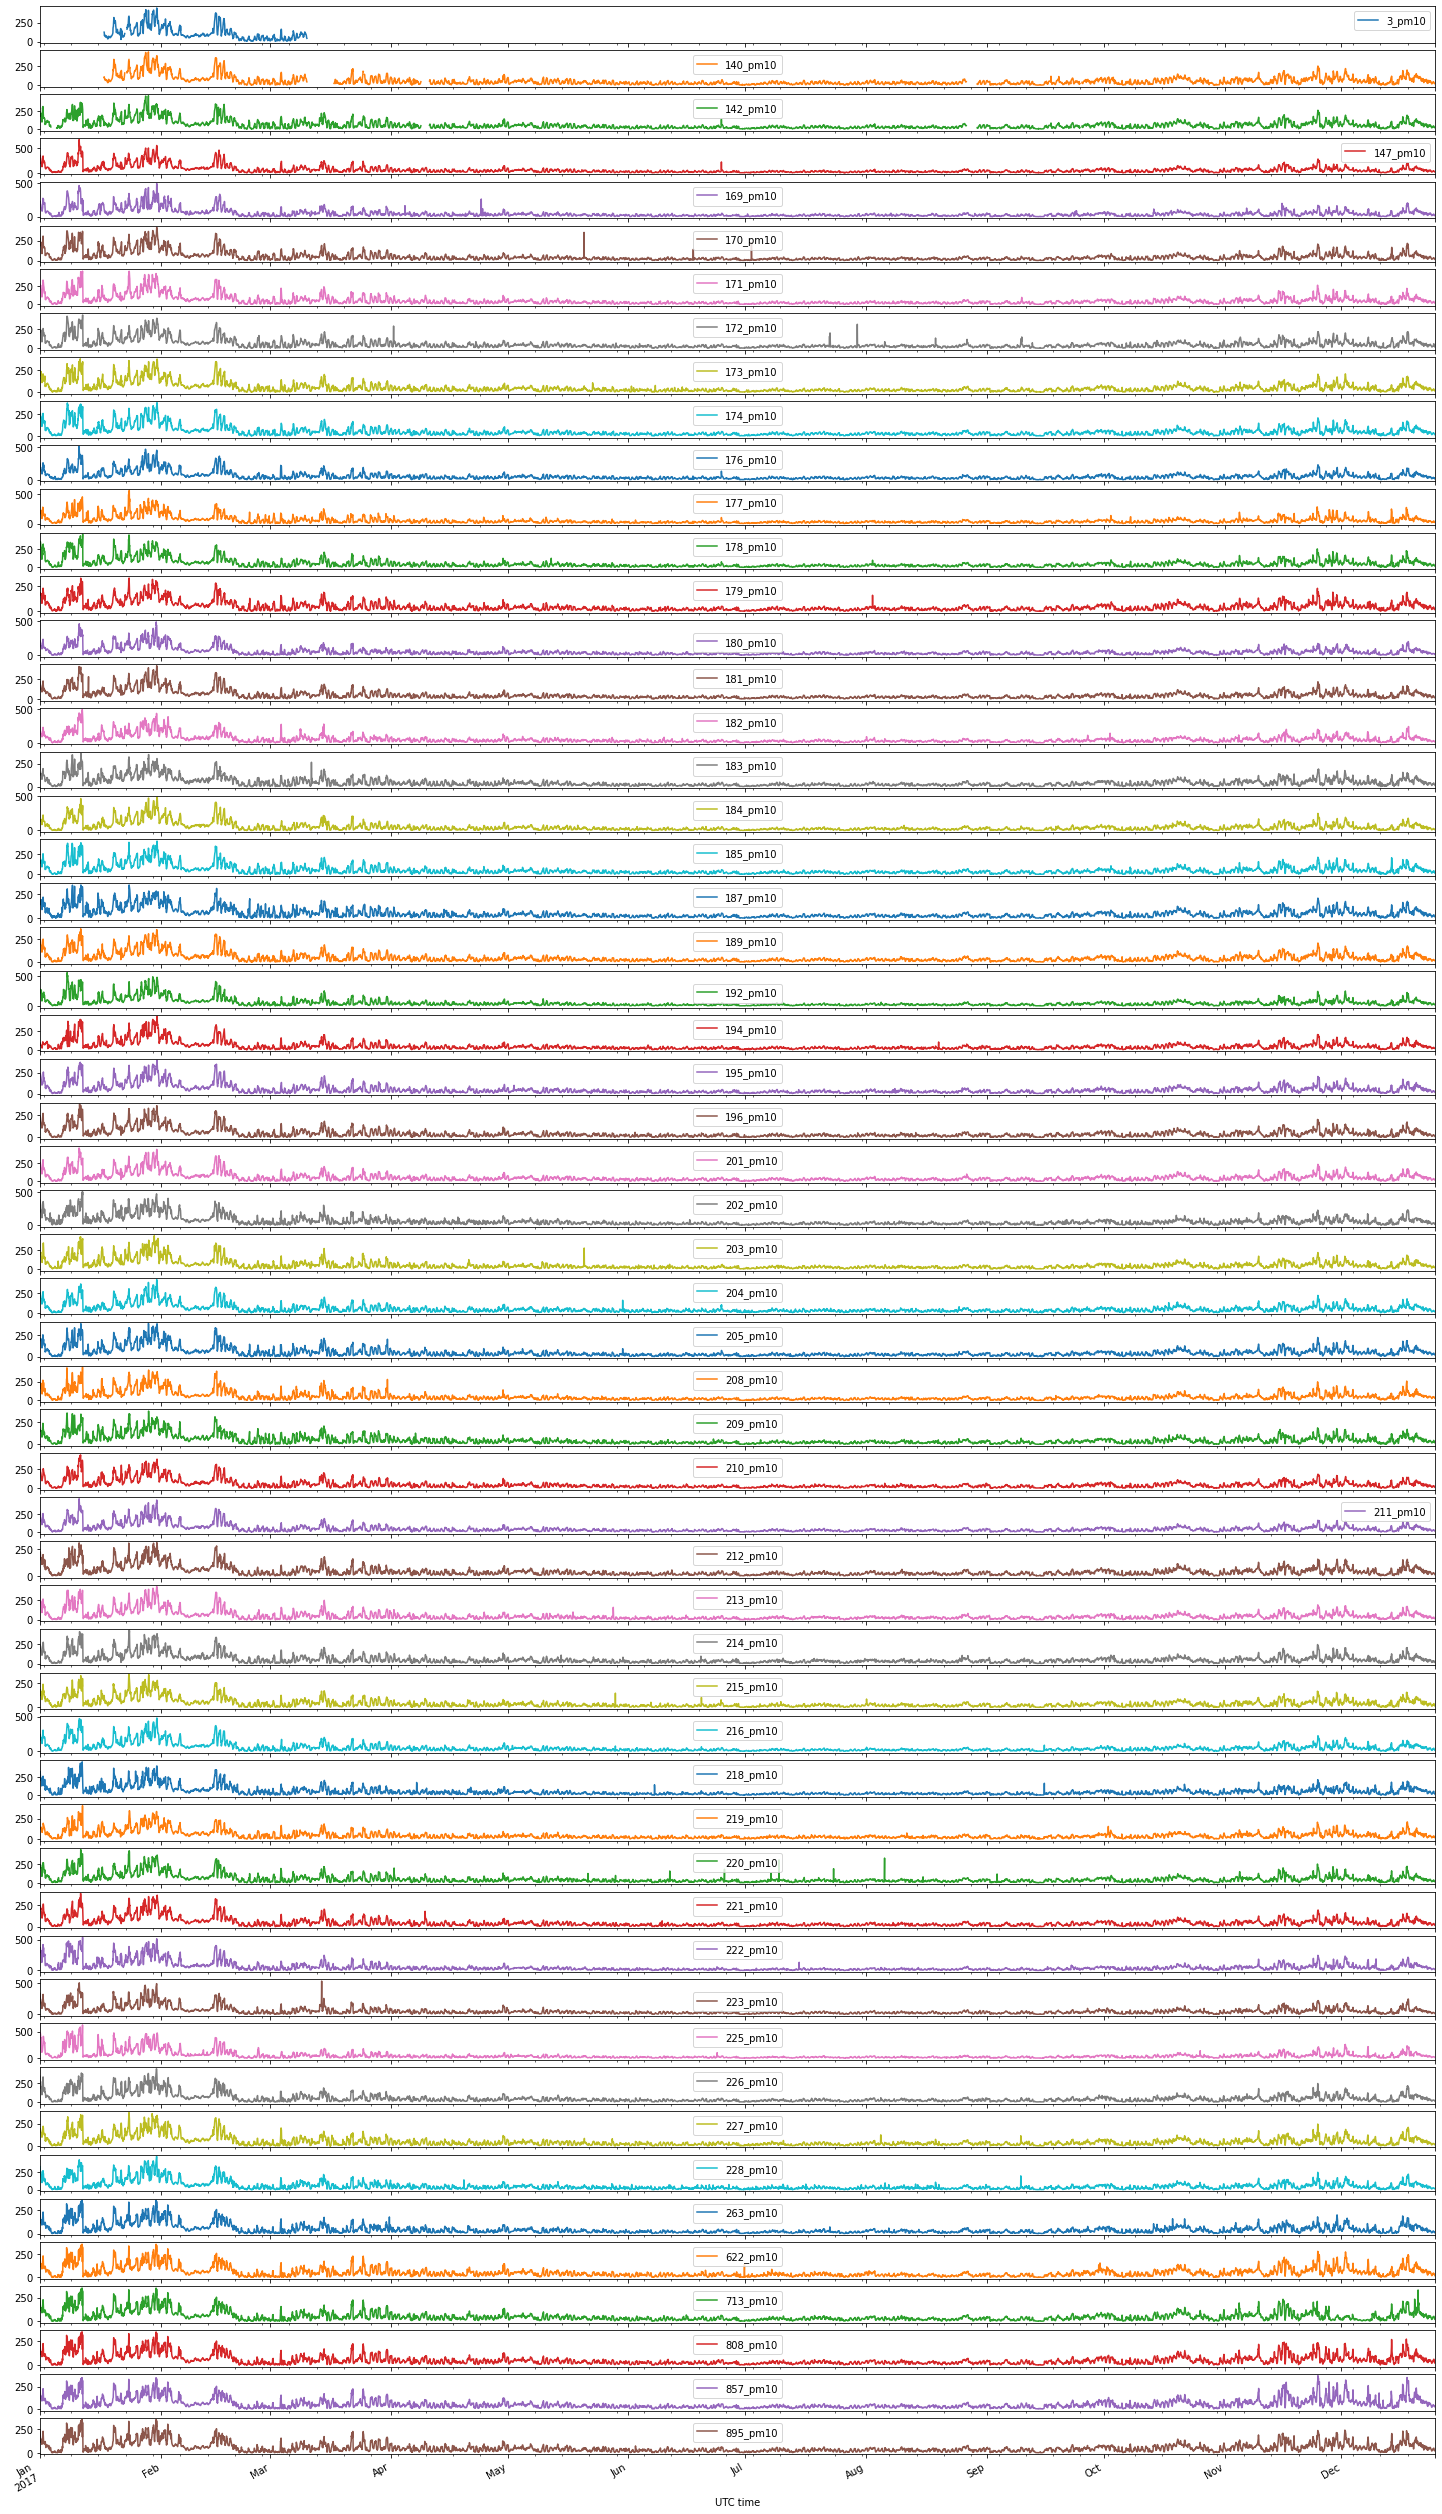

<Figure size 432x288 with 0 Axes>

In [15]:
year[columns_pm10].plot(figsize=(25,50), legend=True, subplots=True)
plt.show()
plt.savefig('time-series-pm10.png')